In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)

(1797, 8, 8)


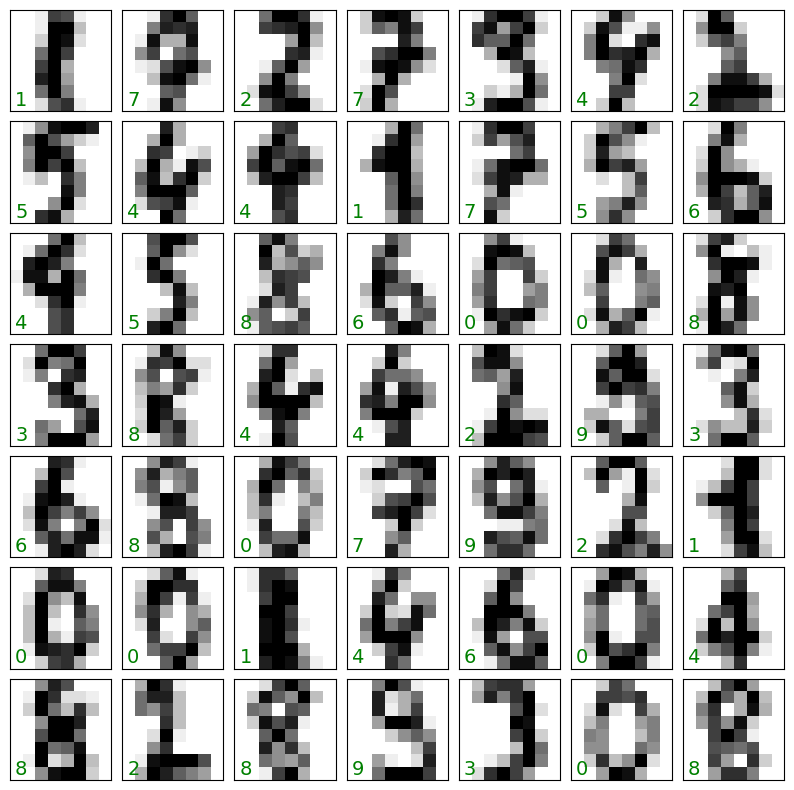

In [4]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

64-dimensions parameter space, but it's difficult to plot points in 64 dimensions! 
It's necessary to reduce the dimensionality of the space, so I use **unsupervised learning**, in particular Isomap. Isomap is an embedding tecnique, which tries to understand if your N dimensional datapoint live in a N dimensional (with N<M) manyfold.

In [5]:
embedding = Isomap(n_components=2)
data_transformed = embedding.fit_transform(digits.data)
print(data_transformed.shape)   

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Asus\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


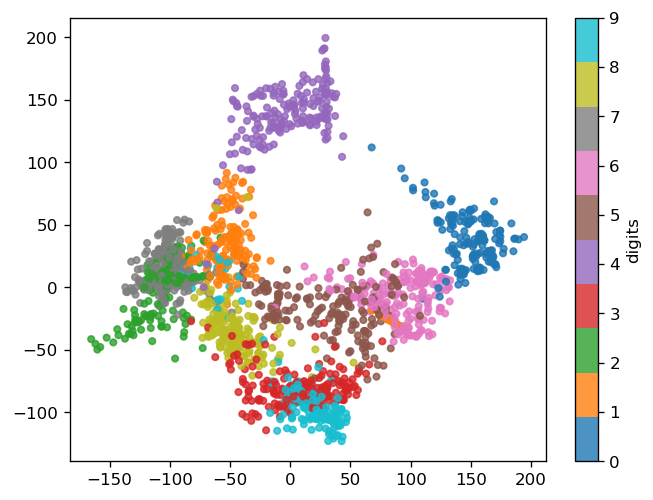

In [7]:
plt.figure(dpi = 120)
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], 
            c=digits.target, cmap='tab10', s=15, alpha=0.8) #prediction already implemented in this dataset
plt.colorbar(label='digits', ticks=range(10))

**Supervised learning**: classification of the digits

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data ,digits.target ,test_size=0.2, train_size=0.8, random_state=3, stratify=digits.target)
modelLR = LogisticRegression(max_iter=1000, solver='sag') 
modelLR.fit(Xtrain,ytrain)

LogisticRegression(max_iter=1000, solver='sag')

In [10]:
ypred = modelLR.predict(Xtest)
acc= accuracy_score(ytest, ypred) #accuracy is simply the fraction of the digits that were correctly identified
ypred1 = modelLR.predict(Xtrain)
acc1 = accuracy_score(ytrain, ypred1)
print('validation accuracy: ', acc)
print('training set accuracy: ', acc1)

validation accuracy:  0.9638888888888889
training set accuracy:  1.0


In [11]:
print(confusion_matrix(ytest, ypred))  #the prediction got it right for almost all digits! it missed classification mostly for the number 5
print(multilabel_confusion_matrix(ytest, ypred)[5])

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  1  0  0  0 32  0  0  0  3]
 [ 0  0  0  0  0  1 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  2  0  0 31  1]
 [ 1  1  0  0  0  0  0  0  0 34]]
[[321   3]
 [  4  32]]
